           S            E            I            R 
9.999998e-01 9.993162e-08 6.474150e-08 2.977128e-08 
           S            E            I            R 
9.999997e-01 1.431698e-07 6.563264e-08 5.426028e-08 
           S            E            I            R 
9.999997e-01 1.736346e-07 7.275252e-08 7.987446e-08 
           S            E            I            R 
9.999996e-01 2.000588e-07 8.252577e-08 1.083979e-07 
           S            E            I            R 
9.999995e-01 2.238167e-07 9.301272e-08 1.386654e-07 
           S            E            I            R 
9.999995e-01 2.474898e-07 1.043009e-07 1.726902e-07 
           S            E            I            R 
9.999994e-01 2.715354e-07 1.161812e-07 2.107105e-07 
           S            E            I            R 
9.999993e-01 2.961627e-07 1.285588e-07 2.529135e-07 
           S            E            I            R 
9.999992e-01 3.214656e-07 1.413912e-07 2.994630e-07 
           S            E            I        

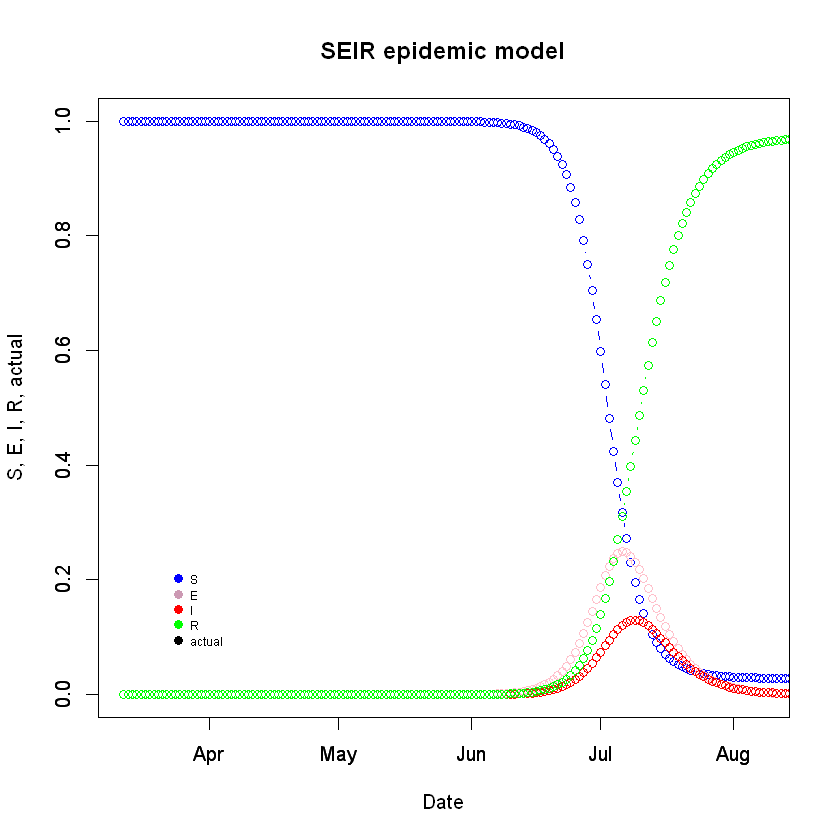

In [5]:
#install.packages("deSolve")
library (deSolve)
seir_model = function (current_timepoint, state_values, parameters)
{
  # create state variables (local variables)
  S = state_values [1]        # susceptibles
  E = state_values [2]        # exposed
  I = state_values [3]        # infectious
  R = state_values [4]        # recovered
  
  with (
    as.list (parameters),     # variable names within parameters can be used 
    {
      # compute derivatives
      dS = (-beta * S * I)
      dE = (beta * S * I) - (delta * E)
      dI = (delta * E) - (gamma * I)
      dR = (gamma * I)
      
      # combine results
      results = c (dS, dE, dI, dR)
      list (results)
    }
  )
}

# contact_rate = 14.781                     # number of contacts per day -> depends on social patterns
# transmission_probability = 2.1*10^-8       # transmission probability
infectious_period = 2.9                 # infectious period
latent_period = 5.2                     # latent/incubation period

# beta_value = contact_rate * transmission_probability     # effective contract rate
gamma_value = 1 / infectious_period
delta_value = 1 / latent_period
W = 966000130           # susceptible hosts -> 70% of the population
X = 0                 # exposed hosts
Y = 82                 # infected hosts -> number of people infected due to travel abroad in initial days
Z = 0                 # recovered hosts
N = W + X + Y + Z     # total population
initial_values = c(S = W/N, E = X/N, I = Y/N, R = Z/N)
roval <- as.data.frame(read.csv( "./ro1.csv", sep = ","))
Ro = c(roval$ro, 2.2, 3.68)
t = c(seq(2,2,length.out=20), 30, 100)
outputs <- data.frame()
i <- 1
# beta_value = gamma_value*Ro
for (val in Ro) {
  beta_value = gamma_value*val
  parameter_list = c(beta = beta_value, gamma = gamma_value, delta = delta_value)
  timepoints = seq(1, t[i], by=1)
  result = lsoda(initial_values, timepoints, seir_model, parameter_list)
  outputs <- rbind(outputs,result)
  initial_values = result[length(result[,1]),-1]
  print(initial_values)
  i = i+1
}

# startDate <- as.Date("12-Mar", format = "%d-%b")
# newIndia.xts <- subset(india.xts, index(india.xts)>=startDate)
# head(newIndia.xts$Total.Confirmed)

# tbu <- as.numeric(newIndia.xts$Total.Confirmed)/966000130
# length(tbu)

startDate = as.Date("12-Mar", format="%d-%b")
endDate = as.Date(startDate + length(outputs[,1]) - 1)
dates <- seq(startDate, endDate, by="days")
# dates1 <- seq(startDate, as.Date(startDate+length(tbu) - 1), by="days")

plot(dates, outputs[,"S"], type='b', ylim = c(0,1), xlim = as.Date(c("2020-03-12", "2020-08-08")), col='blue', xlab="Date", ylab="S, E, I, R, actual", main = "SEIR epidemic model")
par (new = TRUE)
plot(dates, outputs[,"E"], type='b', ylim = c(0,1), xlim = as.Date(c("2020-03-12", "2020-08-08")), col='pink', xlab="", ylab="")
par (new = TRUE)
plot(dates, outputs[,"I"], type='b', ylim = c(0,1), xlim = as.Date(c("2020-03-12", "2020-08-08")), col='red', xlab="", ylab="")
par (new = TRUE)
plot(dates, outputs[,"R"], type='b', ylim = c(0,1), xlim = as.Date(c("2020-03-12", "2020-08-08")), col='green', xlab="", ylab="")
par (new = TRUE)
# plot(dates1, tbu, type='b', ylim = c(0,1), xlim = as.Date(c("2020-03-12", "2020-08-08")), col='black', xlab="", ylab="")

legend("bottomleft", 
       legend = c("S", "E", "I", "R", "actual"), 
       col = c(rgb(0,0,1),rgb(0.8,0.6,0.7), rgb(1,0,0), rgb(0,1,0), rgb(0,0,0)), 
       pch = c(19, 19, 19, 19, 19), 
       bty = "n", 
       pt.cex = 1, 
       cex = 0.6, 
       text.col = "black", 
       horiz = F , 
       inset = c(0.1, 0.1, 0.1, 0.1, 0.1)
)